### Correlation vaxx rate v.s. census factors

In [1]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import matplotlib.cm as cm

%matplotlib inline

In [37]:
df = pd.read_csv('../cleaning_etl/cleanjoin1718.csv')

In [20]:
print(df.columns)
print(df.shape)

Index(['facility_num', 'county', 'is_public', 'city', 'facility_name',
       'enrollment', 'n', 'pct', 'vac_info_type', 'reported', 'geoid',
       'geoid2', 'tot_pop', 'male', 'male_pct', 'female', 'female_pct',
       'under_5', 'under_5_pct', '5_9', '5_9_pct', '10_14', '10_14_pct',
       '15_19', '15_19_pct', '20_24', '20_24_pct', '25_34', '25_34_pct',
       '35_44', '35_44_pct', '45_54', '45_54_pct', '55_59', '55_59_pct',
       '60_64', '60_64_pct', '65_74', '65_74_pct', '75_84', '75_84_pct',
       '85_over', '85_over_pct', 'median_age', 'median_age_pct',
       'hispanic_latino', 'hispanic_latino_pct', 'white', 'white_pct', 'black',
       'black_pct', 'aian', 'aian_pct', 'asian', 'asian_pct', 'nhopi',
       'nhopi_pct', 'other', 'other_pct', 'median_income', 'insurance',
       'insurance_pct', 'private_insure', 'private_insure_pct',
       'public_insure', 'public_insure_pct', 'no_insurance',
       'no_insurance_pct'],
      dtype='object')
(18433, 68)


In [51]:
df[:1]

,facility_num,county,is_public,city,facility_name,enrollment,n,pct,vac_info_type,reported,...,other_pct,median_income,insurance,insurance_pct,private_insure,private_insure_pct,public_insure,public_insure_pct,no_insurance,no_insurance_pct
0,10214883,Alameda,HEAD START,Alameda,ALAMEDA HEAD START . ANGELA AGUILAR CENTER,63,61,98,ChildCareData,Y,...,12.5,83048.0,70366.0,92.7,58794.0,77.5,20088.0,26.5,5528.0,7.3


In [54]:
cols = [ 'enrollment', 'n', 'pct', 'tot_pop', 'male_pct', 'female_pct',
         'under_5_pct', '5_9_pct', '10_14_pct', '15_19_pct', '20_24_pct', '25_34_pct', '35_44_pct',
         '45_54_pct', '55_59_pct', '60_64_pct', '65_74_pct', '75_84_pct', '85_over_pct',
         'median_age', 'hispanic_latino_pct', 'white_pct', 'black_pct', 'aian_pct', 'asian_pct',
         'nhopi_pct', 'other_pct', 'median_income', 'insurance_pct',  'private_insure_pct',
         'public_insure_pct', 'no_insurance_pct']

df[cols].head()

,enrollment,n,pct,tot_pop,male_pct,female_pct,under_5_pct,5_9_pct,10_14_pct,15_19_pct,...,black_pct,aian_pct,asian_pct,nhopi_pct,other_pct,median_income,insurance_pct,private_insure_pct,public_insure_pct,no_insurance_pct
0,63,61,98,77409.0,48.7,51.3,5.9,6.0,5.1,4.5,...,7.4,0.2,30.4,0.7,12.5,83048.0,92.7,77.5,26.5,7.3
1,47,44,95,77409.0,48.7,51.3,5.9,6.0,5.1,4.5,...,7.4,0.2,30.4,0.7,12.5,83048.0,92.7,77.5,26.5,7.3
2,44,41,95,77409.0,48.7,51.3,5.9,6.0,5.1,4.5,...,7.4,0.2,30.4,0.7,12.5,83048.0,92.7,77.5,26.5,7.3
3,109,107,99,77409.0,48.7,51.3,5.9,6.0,5.1,4.5,...,7.4,0.2,30.4,0.7,12.5,83048.0,92.7,77.5,26.5,7.3
4,100,99,99,77409.0,48.7,51.3,5.9,6.0,5.1,4.5,...,7.4,0.2,30.4,0.7,12.5,83048.0,92.7,77.5,26.5,7.3


In [ ]:
print(len(df[df.is_public == 'HEAD START'].is_public))
print(len(df[df.is_public == 'PUBLIC'].is_public))
print(len(df[df.is_public == 'PRIVATE'].is_public))

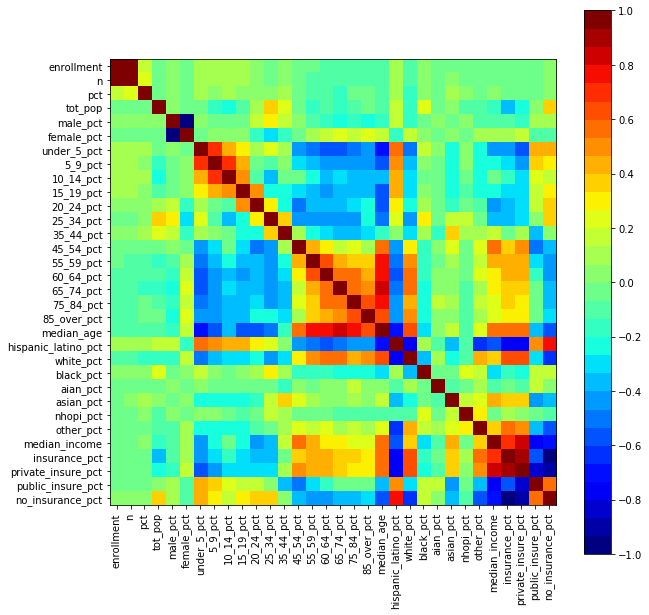

In [103]:
def plot_corr(df_corr,size=10):
    '''
    Args:
        - df_corr: pandas DataFrame of correlation
        - size: vertical and horizontal size of the plot
    '''
    corr = df_corr
    fig, ax = plt.subplots(figsize=(size, size))
    cmap = cm.get_cmap('jet', 30)
    cax = ax.imshow(corr, interpolation="nearest", cmap=cmap)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.xticks(rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    fig.colorbar(cax, ticks=[-1, -.8, -.6,-.4,-.2,0.0, .2, .4, .6, .8, 1])

plot_corr(df[cols].corr())

In [84]:
df_city1617 = pd.read_csv('../cleaning_etl/vac_pct_table1617.CSV')
df_pop1617 = pd.read_csv('../cleaning_etl/pop_data16.csv')

In [96]:
df_pop1617_subset = df_pop1617[['city'] + cols[3:]]

In [99]:
df_merge = df_city1617.merge(df_pop1617_subset, left_on=['city'], right_on=['city'], how='left')
df_merge.head()

,Unnamed: 0,county,city,vac_info_type,pct,tot_pop,male_pct,female_pct,under_5_pct,5_9_pct,...,black_pct,aian_pct,asian_pct,nhopi_pct,other_pct,median_income,insurance_pct,private_insure_pct,public_insure_pct,no_insurance_pct
0,0,Alameda,Alameda,7thGradeData,97.100000,77409.0,48.7,51.3,5.9,6.0,...,7.4,0.2,30.4,0.7,12.5,83048.0,92.7,77.5,26.5,7.3
1,1,Alameda,Alameda,ChildCareData,95.923077,77409.0,48.7,51.3,5.9,6.0,...,7.4,0.2,30.4,0.7,12.5,83048.0,92.7,77.5,26.5,7.3
2,2,Alameda,Alameda,KindergartenData,96.500000,77409.0,48.7,51.3,5.9,6.0,...,7.4,0.2,30.4,0.7,12.5,83048.0,92.7,77.5,26.5,7.3
3,3,Alameda,Albany,7thGradeData,96.000000,19420.0,48.4,51.6,7.7,7.9,...,3.8,0.3,26.4,0.8,13.6,85458.0,95.4,82.8,20.7,4.6
4,4,Alameda,Albany,ChildCareData,94.166667,19420.0,48.4,51.6,7.7,7.9,...,3.8,0.3,26.4,0.8,13.6,85458.0,95.4,82.8,20.7,4.6


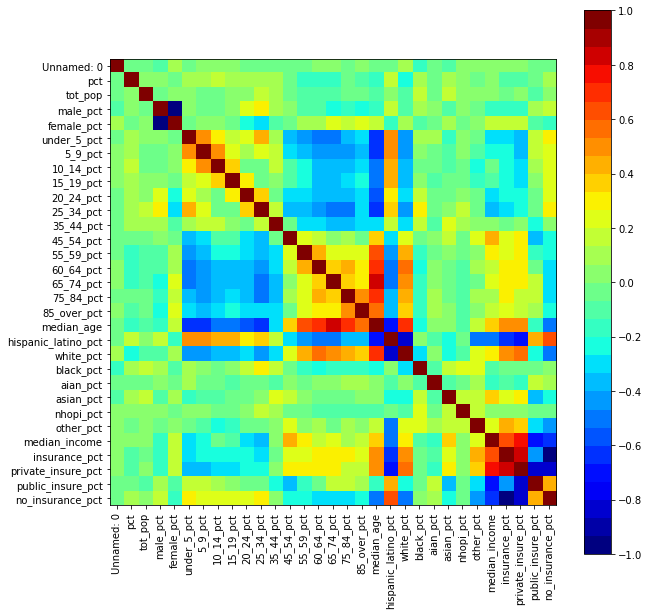

In [100]:
plot_corr(df_merge[3:])

In [161]:
target_cols = ['tot_pop', 'male_pct', 'female_pct', 
                              'under_5_pct', '5_9_pct', '10_14_pct',
                              '15_19_pct', '20_24_pct', '25_34_pct', 
                              '35_44_pct', '45_54_pct', '55_59_pct', 
                              '60_64_pct', '65_74_pct', '75_84_pct', 
                              '85_over_pct', 'median_age', 'hispanic_latino_pct', 
                              'white_pct', 'black_pct', 'aian_pct', 'asian_pct', 
                              'nhopi_pct', 'other_pct', 'median_income',
                              'insurance_pct', 'private_insure_pct', 
                              'public_insure_pct', 'no_insurance_pct']


corr_ls = []
for i, col in enumerate(target_cols):
     corr_ls += [df_merge['pct'].corr(df_merge[col])]

corr_df = pd.DataFrame([corr_ls], index=np.arange(1), columns=target_cols)
corr_df

,tot_pop,male_pct,female_pct,under_5_pct,5_9_pct,10_14_pct,15_19_pct,20_24_pct,25_34_pct,35_44_pct,...,black_pct,aian_pct,asian_pct,nhopi_pct,other_pct,median_income,insurance_pct,private_insure_pct,public_insure_pct,no_insurance_pct
0,0.021459,0.045306,-0.045305,0.124376,0.089724,0.133004,0.113764,0.076606,0.079581,0.10045,...,0.089036,-0.022543,0.102529,0.01693,-0.050848,0.018375,-0.081061,-0.074052,-0.013692,0.081061


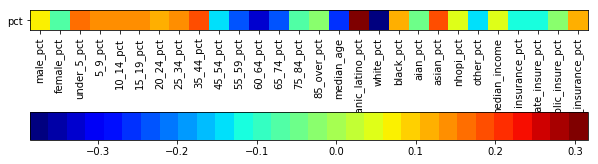

In [4]:
def plot_corr_1D(df_corr,size=10, show_color = 1):
    '''
    Args:
        - df_corr: pandas DataFrame of correlation
        - size: vertical and horizontal size of the plot
    '''
    corr = df_corr
    ncol = len(df_corr.columns)
    nrow = len(df_corr)
    fig, ax = plt.subplots(figsize=(size, size))
    cmap = cm.get_cmap('jet', 30)
    cax = ax.imshow(corr, interpolation="nearest", cmap=cmap)
    plt.xticks(range(ncol), corr.columns)
    plt.xticks(rotation=90)
    plt.yticks(range(nrow), ['pct'])
    if show_color:
        fig.colorbar(cax, orientation='horizontal', ticks = [-.4, -.3, -.2, -.1, 0.0, .1, .2, .3, .4])

plot_corr_1D(corr_df)

In [171]:
corr_df['white_pct']

0   -0.237535
Name: white_pct, dtype: float64

In [2]:
city_corr = pd.read_csv('../cleaning_etl/city_correlation.csv')
county_corr = pd.read_csv('../cleaning_etl/county_correlation.csv')

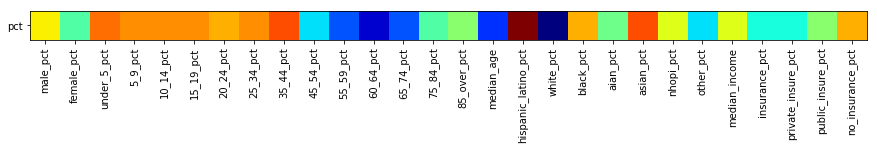

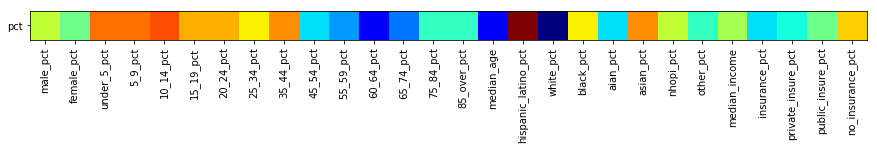

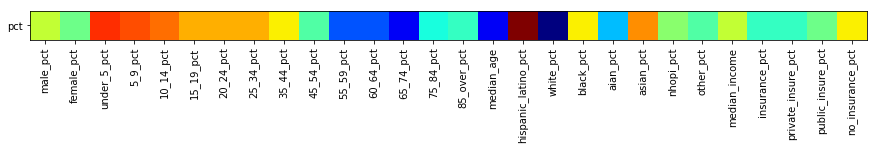

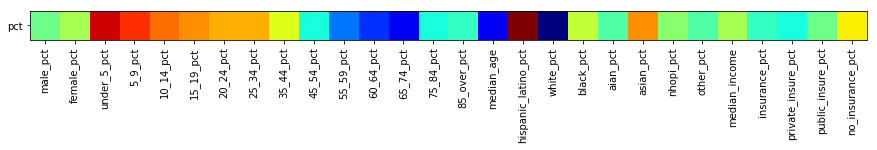

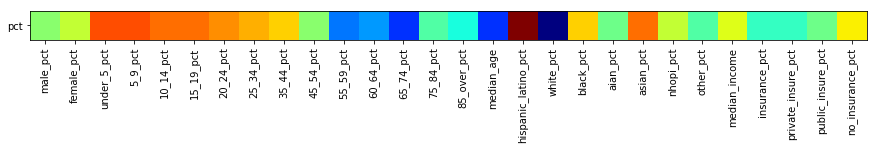

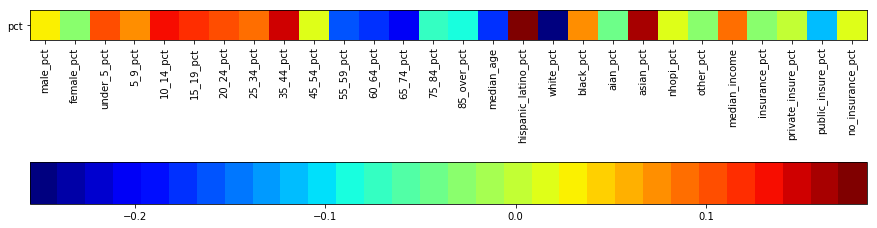

In [6]:
cols = city_corr.columns[7:]
years = [2012, 2013, 2014, 2015, 2016, 2017]

corr_df_ls = []
show_col = 0
for y in years:
    ls = []
    df = city_corr[city_corr['year'] == y]
    for col in cols:
        ls.append(df['vac_pct'].corr(df[col]))
    corr_df = pd.DataFrame([ls], index=np.arange(1), columns=cols)
    corr_df_ls.append((y, corr_df))
    if y == 2017:
        show_col = 1
    plot_corr_1D(corr_df, size = 15, show_color = show_col)

In [189]:
def plot_corr_1D(df_corr_ls,size=10):
    '''
    Args:
        - df_corr_ls: list of (year, pandas DataFrame of correlation) tuples
        - size: vertical and horizontal size of the plot
    '''
    nplots = len(df_corr_ls)
    fig, axs = plt.subplots(nplots, 1, figsize=(size, size))
    images = []
    for k, v in enumerate(df_corr_ls):
        y = v[0]
        df_corr = v[1]
        ncol = len(df_corr.columns)
        nrow = len(df_corr)
        images.append(axs[k, 0].imshow(df_corr, interpolation="nearest"))
        #fig, ax = plt.subplots(figsize=(size, size))
    vmin = min(image.get_array().min() for image in images)
    vmax = max(image.get_array().max() for image in images)
    norm = colors.Normalize(vmin=vmin, vmax=vmax)
    for im in images:
        im.set_norm(norm)

    #cmap = cm.get_cmap('jet', 30)
    #cax = ax.imshow(corr, interpolation="nearest", cmap=cmap)
    plt.xticks(range(ncol), corr.columns)
    plt.xticks(rotation=90)
    plt.yticks(range(nrow), ['pct'])
    fig.colorbar(cax, orientation='vertical')

IndexError: too many indices for array

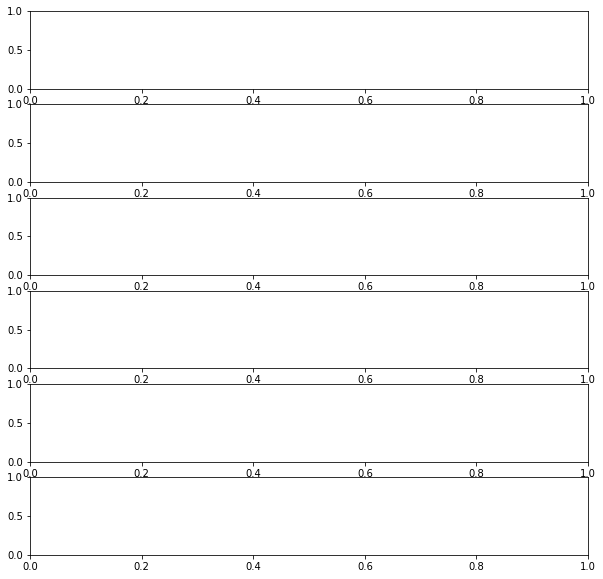

In [193]:
plot_corr_1D(df_corr_ls=corr_df_ls)

In [58]:
def normalize(df):
    df_norm = pd.DataFrame(columns=df.columns)
    for col in df.columns:
        m = np.mean(df[col])
        sd = np.std(df[col])
        df_norm[col] = (df[col] - m)/sd
    return df_norm

In [75]:
cols = ['vac_pct'] + list(city_corr.columns)[7:]
df = city_corr[cols]
df = df.dropna()
df_norm = normalize(df[df.columns[1:]])
df_norm['vac_pct'] = df['vac_pct']/100

In [76]:
df_norm.head()

,male_pct,female_pct,under_5_pct,5_9_pct,10_14_pct,15_19_pct,20_24_pct,25_34_pct,35_44_pct,45_54_pct,...,aian_pct,asian_pct,nhopi_pct,other_pct,median_income,insurance_pct,private_insure_pct,public_insure_pct,no_insurance_pct,vac_pct
0,4.388173,-4.388188,2.362895,-2.354662,-2.541465,-2.486772,2.852121,4.012991,-2.319071,1.076799,...,-0.261019,-0.659489,-0.390501,-1.161379,1.956053,-0.501907,1.105109,-2.686443,0.501896,0.983607
1,-0.053092,0.053081,-0.102897,-0.258956,-0.224540,0.592841,-0.396226,-1.356184,-0.214821,2.250353,...,-0.261019,-0.546022,-0.390501,-0.240625,0.930984,0.758946,1.009610,-0.827957,-0.758945,0.756243
2,0.515740,-0.515751,1.319675,1.374985,1.868167,0.886137,0.845012,0.730703,0.058459,-1.245859,...,-0.233867,-0.450012,0.591948,0.765780,-0.708474,-1.132334,-1.319508,0.663327,1.132317,0.943333
3,-0.359387,0.359376,-0.545476,1.943312,-0.224540,-2.486772,-1.769511,-2.531324,1.206231,-0.145653,...,0.173419,-0.659489,-0.390501,-1.161379,-0.784772,1.207519,0.431309,0.970577,-1.207513,0.900000
4,0.209445,-0.209457,-0.893216,-0.223435,0.336007,0.739489,-0.449045,-0.626787,-0.433444,1.663576,...,-0.233867,-0.135797,-0.390501,-0.090735,1.538915,0.952923,1.412828,-1.502408,-0.952920,0.941144


In [61]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
cols = ['vac_pct'] + list(city_corr.columns)[7:]
df = city_corr[cols]
df = df.dropna()
da = df.values
da_norm = scaler.fit_transform(df)
df = pd.DataFrame(da_norm, columns=cols)

#city_corr['vac_pct_norm'] = (city_corr['vac_pact'] - np.avg(city_corr['vac_pact'])) / np.var(city_corr['vac_pact'])

In [77]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
train, test = train_test_split(df, test_size = 0.25)
train_X = np.array(train[train.columns[1:]])
train_Y = np.array(train[train.columns[0]])
test_X = np.array(test[test.columns[1:]])
test_Y = np.array(test[test.columns[0]])

/anaconda2/envs/py36/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [66]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l2')
lr.fit(train_X, train_Y)

print("training score: ", lr.score(train_X, train_Y))
print("test score: ", lr.score(test_X, test_Y))

ValueError: Unknown label type: 'continuous'

In [68]:
train_X.shape

(4365, 28)